# First evaluation insights for the Airtel network

**Inputs:**
* Algorithms: bjointsp, greedy, random
* Network: Airtel
* Service: fw1chain, fw2chain, fw3chain
* Sources: source0-9

Airtel is a medium-large network with nodes far away from each other. This leads to high link delays and lower impact of rounding link delays to full integers, which was a problem with the very dense Colt network.

![Airtel](http://topology-zoo.org/maps/Airtel.jpg)

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# include and import util/eval.py
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path) 
from util import eval


bjointsp_chain_df, bjointsp_aux_chain_df, bjointsp_vnf_df, bjointsp_aux_vnf_df = eval.prepare_eval('Airtel', 'bjointsp')
greedy_chain_df, greedy_aux_chain_df, greedy_vnf_df, greedy_aux_vnf_df = eval.prepare_eval('Airtel', 'greedy')
random_chain_df, random_aux_chain_df, random_vnf_df, random_aux_vnf_df = eval.prepare_eval('Airtel', 'random')

There are 12 different pandas dataframes, four for each of the placement algorithms. 

chain_df contains the delays (RTTs) of the whole chain and vnf_df contains the inter-VNF delays. They have separate columns for the simulation and emulation RTTs and additional columns for the difference and the ratio between simulation and emulation RTT.

For easier plotting later, aux_chain_df and aux_vnf_df contain the same data as chain_df and vnf_df, respectiveley, just in a different structure: Here, there is just one column called 'rtt'. Simulation and emulation delays are stored in the same column in different rows. They are distinguished by a new column 'type' that is either 'sim' or 'emu', classifying the type of RTT.

For better intuition, see the tables below.

In [24]:
bjointsp_chain_df.head()

,network,num_nodes,num_edges,service,num_vnfs,sources,num_sources,algorithm,sim_rtt,emu_rtt,rtt_diff,rtt_ratio
0,Airtel.graphml,16,37,fw1chain.yaml,3,source0.yaml,1,bjointsp,74.0,75.10,1.10,1.014865
1,Airtel.graphml,16,37,fw1chain.yaml,3,source1.yaml,1,bjointsp,28.0,29.05,1.05,1.037500
2,Airtel.graphml,16,37,fw1chain.yaml,3,source2.yaml,1,bjointsp,64.0,65.10,1.10,1.017187
3,Airtel.graphml,16,37,fw1chain.yaml,3,source3.yaml,1,bjointsp,124.0,125.10,1.10,1.008871
4,Airtel.graphml,16,37,fw1chain.yaml,3,source4.yaml,1,bjointsp,48.0,49.10,1.10,1.022917


In [25]:
bjointsp_aux_chain_df.head()

,algorithm,network,num_nodes,num_edges,service,num_vnfs,sources,num_sources,rtt,type
0,bjointsp,Airtel.graphml,16,37,fw1chain.yaml,3,source0.yaml,1,74.0,sim
1,bjointsp,Airtel.graphml,16,37,fw1chain.yaml,3,source1.yaml,1,28.0,sim
2,bjointsp,Airtel.graphml,16,37,fw1chain.yaml,3,source2.yaml,1,64.0,sim
3,bjointsp,Airtel.graphml,16,37,fw1chain.yaml,3,source3.yaml,1,124.0,sim
4,bjointsp,Airtel.graphml,16,37,fw1chain.yaml,3,source4.yaml,1,48.0,sim


In [26]:
bjointsp_vnf_df.head()

,network,num_nodes,num_edges,service,num_vnfs,sources,num_sources,algorithm,src,dest,sim_rtt,emu_rtt,rtt_diff,rtt_ratio
0,Airtel.graphml,16,37,fw1chain.yaml,3,source0.yaml,1,bjointsp,vnf_user,vnf_fw1,60.0,60.793,0.793,1.013217
1,Airtel.graphml,16,37,fw1chain.yaml,3,source0.yaml,1,bjointsp,vnf_fw1,vnf_web,14.0,14.338,0.338,1.024143
2,Airtel.graphml,16,37,fw1chain.yaml,3,source1.yaml,1,bjointsp,vnf_user,vnf_fw1,14.0,14.321,0.321,1.022929
3,Airtel.graphml,16,37,fw1chain.yaml,3,source1.yaml,1,bjointsp,vnf_fw1,vnf_web,14.0,14.317,0.317,1.022643
4,Airtel.graphml,16,37,fw1chain.yaml,3,source2.yaml,1,bjointsp,vnf_user,vnf_fw1,44.0,44.630,0.630,1.014318


## Chain RTT

Let's start the evaluation by analyzing the RTT of the whole chain, comparing the different placement algorithms.

Text(0.5,1,'Emulation chain RTT')

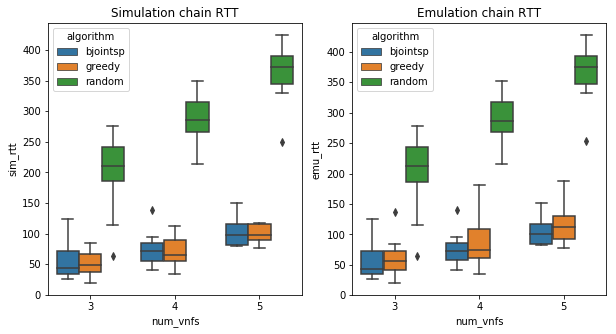

In [2]:
# comparison of bjointsp and random placement
# df with combined/concatenated results of both bjointsp and random
chain_df = pd.concat([bjointsp_chain_df, greedy_chain_df, random_chain_df])

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
sns.boxplot(x='num_vnfs', y='sim_rtt', hue='algorithm', data=chain_df, ax=ax1).set_title('Simulation chain RTT')
sns.boxplot(x='num_vnfs', y='emu_rtt', hue='algorithm', data=chain_df, ax=ax2).set_title('Emulation chain RTT')

Clearly, random placement leads to much higher simulation and emulation delays than bjointsp and greedy placement. Greedy placement and bjointsp perform comparably. For all algorithms, the delays increase notably with increasing chain length (num_vnfs).

Text(0.5,1,'Random chain RTT')

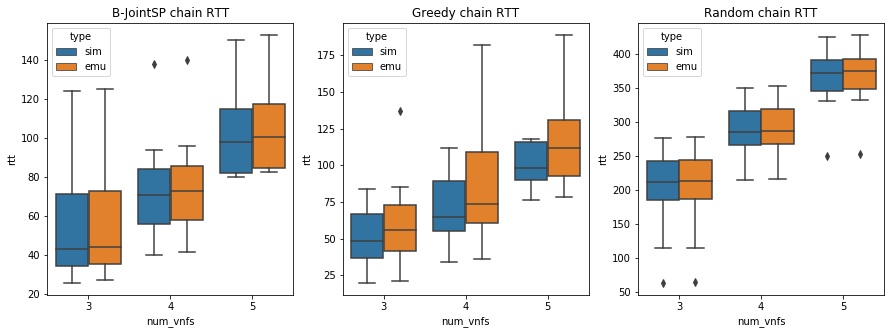

In [4]:
# comparison of simulation and emulation delays
# this is what aux_chain_df is for
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
sns.boxplot(x='num_vnfs', y='rtt', hue='type', data=bjointsp_aux_chain_df, ax=ax1).set_title('B-JointSP chain RTT')
sns.boxplot(x='num_vnfs', y='rtt', hue='type', data=greedy_aux_chain_df, ax=ax2).set_title('Greedy chain RTT')
sns.boxplot(x='num_vnfs', y='rtt', hue='type', data=random_aux_chain_df, ax=ax3).set_title('Random chain RTT')

Chain delays seem to be very similar comparing simulation and emulation. Clearly, there are a variety of different RTTs per service/chain length because of different placement (each one has a different source location).
Generally, the emulated RTTs seem to be slightly higher than the simulated RTTs - especially for greedy placement.


### Chain RTT difference

Absolute difference between emulated and simulated chain RTT: emu_rtt - sim_rtt

Text(0.5,1,'Random chain RTT difference')

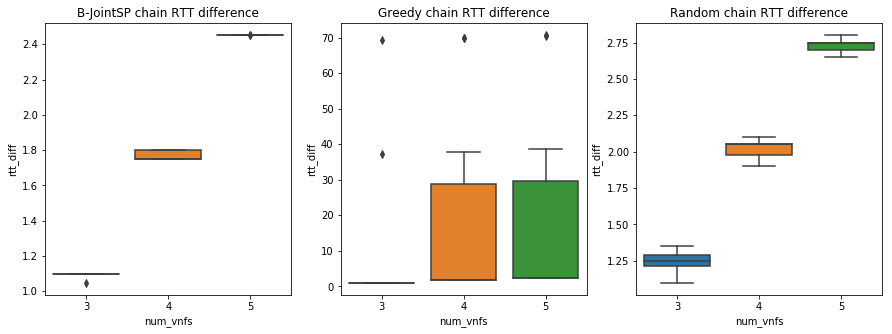

In [5]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
sns.boxplot(x='num_vnfs', y='rtt_diff', data=bjointsp_chain_df, ax=ax1).set_title('B-JointSP chain RTT difference')
sns.boxplot(x='num_vnfs', y='rtt_diff', data=greedy_chain_df, ax=ax2).set_title('Greedy chain RTT difference')
sns.boxplot(x='num_vnfs', y='rtt_diff', data=random_chain_df, ax=ax3).set_title('Random chain RTT difference')

When looking at the difference in RTT, the emulation delay is clearly higher than the simulation delay. And the difference between the two increases with increasing chain length. There is surprisingly little deviation in rtt_diff for each chain length.

This observation holds for bjointsp and random placement algorithms, but it looks very different for greedy placement! There are some greedy placements with 4 or 5 VNFs that have much higher emulated than simulated chain RTT. Why?

In [13]:
# check greedy placements with high rtt_diff
greedy_chain_df.loc[greedy_chain_df['rtt_diff'] > 3]

,network,num_nodes,num_edges,service,num_vnfs,sources,num_sources,algorithm,sim_rtt,emu_rtt,rtt_diff,rtt_ratio
1,Airtel,16,26,fw1chain,3,source1,1,greedy,26.0,63.15,37.15,2.428846
7,Airtel,16,26,fw1chain,3,source7,1,greedy,68.0,137.20,69.20,2.017647
11,Airtel,16,26,fw2chain,4,source1,1,greedy,40.0,77.85,37.85,1.946250
12,Airtel,16,26,fw2chain,4,source2,1,greedy,112.0,181.85,69.85,1.623661
17,Airtel,16,26,fw2chain,4,source7,1,greedy,74.0,143.90,69.90,1.944595
21,Airtel,16,26,fw3chain,5,source1,1,greedy,96.0,134.65,38.65,1.402604
22,Airtel,16,26,fw3chain,5,source2,1,greedy,118.0,188.55,70.55,1.597881
27,Airtel,16,26,fw3chain,5,source7,1,greedy,110.0,180.60,70.60,1.641818


An rtt_diff of up to 3 ms is comparable to the other algorithms. For greedy, there are 8 placements with much higher rtt_diff. Each of them with source1 (Chennai), 2 (NYIX), or 7 (New York).

As an example, check the first one: fw1chain with source1. Looking at the placement files shows that the delay from vnf_user to vnf_fw1 is as expected and similar for both simulation and emulation. But the delay from vnf_fw1 to vnf_web is much higher in emulation than in simulation. Why? Different routing?

Simulation: vnf_fw1 - vnf_web RTT = 2 * 10 = 20 ms

```yaml
- delay: 10
  dest: vnf_web
  dest_node: pop14
  src: vnf_fw1
  src_node: pop9
```

Emulation: vnf_fw1 - vnf_web RTT = 56.8 ms in avg

```yaml
- delay: 56.786
  dest: vnf_web
  max: 113.671
  min: 56.163
  src: vnf_fw1
  stddev: 5.717
```

vnf_fw1 is placed at pop9 (Mumbai) and vnf_web is placed at pop14 (Singapore). The shortest path of 10 ms, used by simulation, goes through pop1 (Chennai).
When starting the VNFs manually and connecting them with `vim-emu network add`, it shows that the emulator uses the same path:

```
 "path": [
  "dc10.s1", 
  "dc2.s1", 
  "dc15.s1"
 ], 
 ```
 
Note: dc10 refers to pop9, dc2 to pop1, dc15 to pop14. 

**TODO:** Then why is the delay still so much higher if it's the same path? Does this only/always happen for VNFs that are connected via multiple hops? Is this just some legid dirt effect - something that may just happen in reality, too?

### Chain RTT ratio

Relative ratio of emulated vs. simulated chain RTT: emu_rtt / sim_rtt

Text(0.5,1,'Chain RTT ratio')

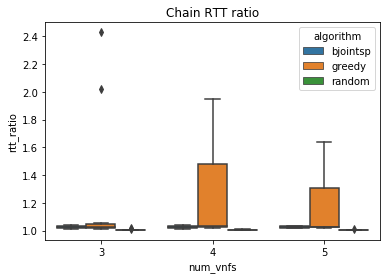

In [18]:
sns.boxplot(x='num_vnfs', y='rtt_ratio', hue='algorithm', data=chain_df).set_title('Chain RTT ratio')

**Greedy**: Few, very high emulation delay with ratios well above 1. This "ruins" the plot for the other algorithms.

Observations without greedy:

**B-JointSP**: While the absolute difference between emulated and simulated chain RTT clearly increases for increasing chain length, the relative ratio of the two stays fairly constant at slightly above 1.
The spread is higher for chains with three VNFs than with four or five, probably due to the shorter sim_rtt (deviations affect the ratio stronger).

**Random**: While the RTT difference is higher, random placement actually has a lower ratio RTT ratio compared to B-JointSP. Also the spread is smaller. This is probably also due to the longer path lengths and higher overall delays, leading to lower ratios and less relative spread. Here, the ratio seems to increase very slightly with longer chains lengths.

## Inter-VNF RTT
Let's do the same for inter-VNF delays/RTTs. Now, we're looking at two VNFs in isolation, i.e., independent of the rest of the chain. Thus, we're not considering chain length.

**TODO:** Probably better to start with inter-VNF delay and then argue that chain delays are based on inter-VNF delays.

Text(0.5,1,'Inter-VNF RTT')

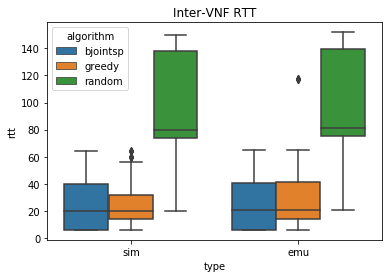

In [19]:
aux_vnf_df = pd.concat([bjointsp_aux_vnf_df, greedy_aux_vnf_df, random_aux_vnf_df])

sns.boxplot(x='type', y='rtt', hue='algorithm', data=aux_vnf_df).set_title('Inter-VNF RTT')

As expected, random placement also leads to much higher inter-VNF delays than bjointsp and greedy.
The difference between simulation and emulation delays seems to be negligible when considering inter-VNF RTTs. Let's look into that further.

### Inter-VNF RTT difference

Absolute difference between emulated and simulated inter-VNF RTT: emu_rtt - sim_rtt

(0, 2)

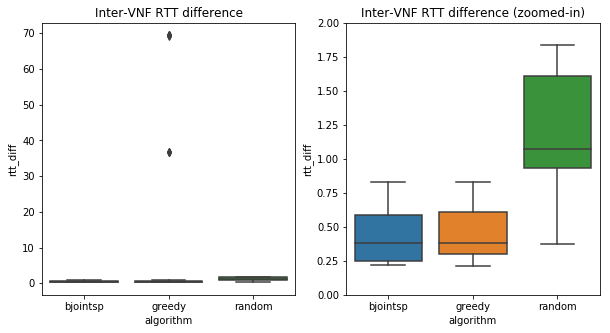

In [23]:
vnf_df = pd.concat([bjointsp_vnf_df, greedy_vnf_df, random_vnf_df])

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
sns.boxplot(x='algorithm', y='rtt_diff', data=vnf_df, ax=ax1).set_title('Inter-VNF RTT difference')
sns.boxplot(x='algorithm', y='rtt_diff', data=vnf_df, ax=ax2).set_title('Inter-VNF RTT difference (zoomed-in)')
ax2.set_ylim([0, 2])

The absolute difference between simulated and emulated inter-VNF RTTs is rather small - except for some heavy outliers in greedy placements (left figure).

For bjointsp, it is generally smaller (< 1ms) than for random placement. Also the spread is smaller for bjointsp. This is probably due to the longer paths in random placement, which allow for more deviation between simulation and emulation. (Similar to the observation for chain RTTs.)

Compared to chain RTTs: 
The simulation-emulation difference for chain RTTs was mainly influenced by the chain length. Longer chains lead to a higher difference between simulated and emulated chain RTT. For a given chain length, the spread is very low, i.e., all placements have a very similar chain RTT difference per chain length.

For inter-VNF RTTs, there is a significant spread of the inter-VNF RTT difference (emulation vs simulation). Both for bjointsp and random. Where does this spread come from?

Text(0.5,1,'Random inter-VNF RTT difference')

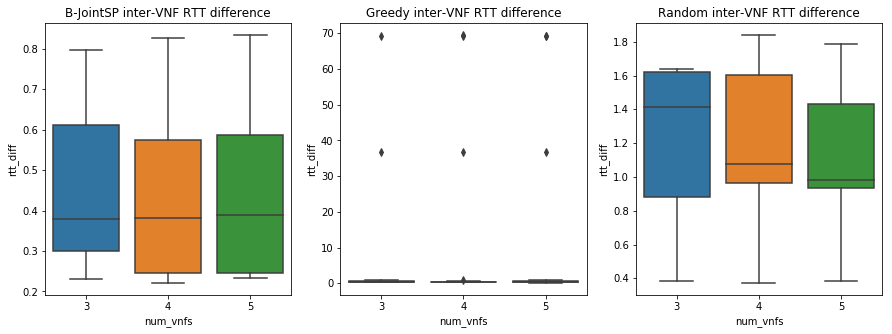

In [24]:
# plot RTT difference for different chain lengths
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
sns.boxplot(x='num_vnfs', y='rtt_diff', data=bjointsp_vnf_df, ax=ax1).set_title('B-JointSP inter-VNF RTT difference')
sns.boxplot(x='num_vnfs', y='rtt_diff', data=greedy_vnf_df, ax=ax2).set_title('Greedy inter-VNF RTT difference')
sns.boxplot(x='num_vnfs', y='rtt_diff', data=random_vnf_df, ax=ax3).set_title('Random inter-VNF RTT difference')

Other than for chain RTTs, the chain length does not affect the inter-VNF RTT and cannot explain the large spread in inter-VNF RTT difference, nor the extreme outliers of greedy placement.

Text(0.5,1,'Random placement')

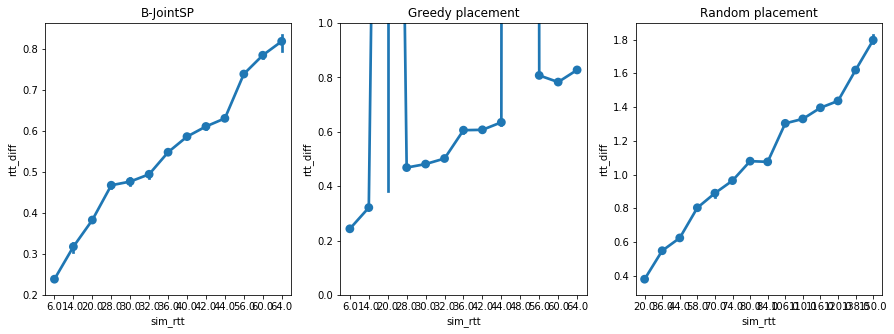

In [33]:
# plot RTT difference as a variable of the node distance = link delay = sim delay/RTT
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
sns.pointplot(x='sim_rtt', y='rtt_diff', data=bjointsp_vnf_df, ax=ax1).set_title('B-JointSP')
sns.pointplot(x='sim_rtt', y='rtt_diff', data=greedy_vnf_df, ax=ax2).set_title('Greedy placement')
ax2.set_ylim([0, 1])
sns.pointplot(x='sim_rtt', y='rtt_diff', data=random_vnf_df, ax=ax3).set_title('Random placement')

The difference of emulated and simulated inter-VNF RTTs increases with increasing simulated inter-VNF RTT. The simulated inter-VNF RTT directly reflects the link delay and thus distance between two connected VNFs.

Hence, for two very close VNFs, the simulated and emulated delays are almost identical, but for VNFs that are placed farther away (higher sim_rtt), the emulated delay can be significantly larger than the simulated delay.

This holds for all algorithms. But for greedy placement, the outliers cannot be explained by higher sim_rtt.


### Inter-VNF RTT ratio

Relative ratio of emulated vs. simulated inter-VNF RTT: emu_rtt / sim_rtt

Set to infinity if sim_rtt = 0.

In [26]:
# set infinite ratios to NaN, so they are ignored when plotting
print('Entries with inifinite ratio: {}'.format(vnf_df['rtt_ratio'].loc[vnf_df['rtt_ratio'] == np.inf].count()))
vnf_df = vnf_df.replace(np.inf, np.nan)

Entries with inifinite ratio: 0


(1, 1.05)

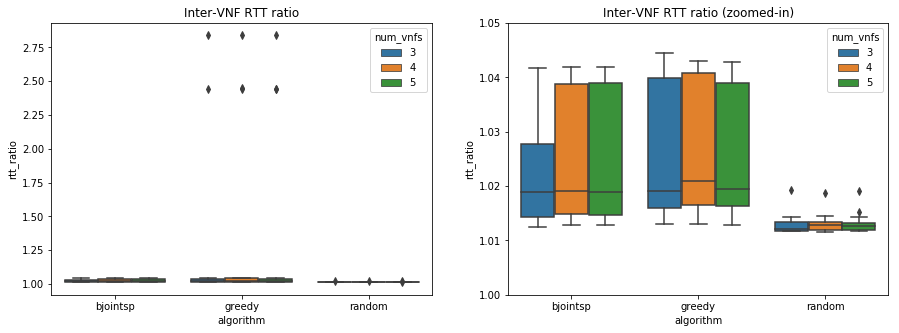

In [31]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
sns.boxplot(x='algorithm', y='rtt_ratio', hue='num_vnfs', data=vnf_df, ax=ax1).set_title('Inter-VNF RTT ratio')
sns.boxplot(x='algorithm', y='rtt_ratio', hue='num_vnfs', data=vnf_df, ax=ax2).set_title('Inter-VNF RTT ratio (zoomed-in)')
ax2.set_ylim([1, 1.05])

Similar to the chain RTT ratio, the inter-VNF RTT ratio is pretty much constant with increasing chain length and very close to 1 - except to the heavy outliers of some greedy placements.

Random placement has slightly lower ratios with significantly lower spread than the other algorithms. This is likely due to the overall longer paths between VNFs in random placment, which lead to a lower relative ratio between emulated and simulated delay.

# Conclusion

* Random placement leads to much higher delays than B-JointSP and greedy placement
* Greedy placement and B-JointSP mostely lead to similar delays. B-JointSP is more sophisticated but only optimizes delay as last objective.
* For all algorithms, the chain RTT clearly increases with increasing chain length
* For longer chains, also the absolute difference of simulated vs emulated chain RTT increases
* The inter-VNF RTT and RTT difference (simulation vs emulation) are mostly influenced by the distance of the two connected VNFs
* In general, higher distance/chain length leads to higher absolute difference between simulation and emulation RTT but lower relative ratio of emulation and simulation RTT.

Surprising:
* There can be unexpected behavior in emulation, leading to significantly higher delays (order of 2-3x higher). Happend for greedy placement.